In [1]:
from hydrogenCommunity import hydrogenCommunity
import numpy as np
import pandas as pd

In [2]:
building_list = [('inputs/building1.csv', 10), ('inputs/building2.csv', 10), ('inputs/building3.csv', 10)]
pv_list = [('inputs/pv1.csv', 10), ('inputs/pv2.csv', 10), ('inputs/pv3.csv', 10)]
vehicle_list = ['inputs/vehicle_atHomeSchd.csv', ('inputs/vehicle1.csv', 100, 300, 3), 
               ('inputs/vehicle2.csv', 100, 300, 3), ('inputs/vehicle3.csv', 100, 300, 3)]

In [3]:
env = hydrogenCommunity(building_list, pv_list, vehicle_list)

c:\users\yingdong\gym\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
env.obs_names

['buildingLoad',
 'pvGeneration',
 'vehicle_park_0',
 'vehicle_park_1',
 'vehicle_park_2',
 'vehicle_park_3',
 'vehicle_park_4',
 'vehicle_park_5',
 'vehicle_park_6',
 'vehicle_park_7',
 'vehicle_park_8',
 'vehicle_max_dist_0',
 'vehicle_max_dist_1',
 'vehicle_max_dist_2',
 'vehicle_max_dist_3',
 'vehicle_max_dist_4',
 'vehicle_max_dist_5',
 'vehicle_max_dist_6',
 'vehicle_max_dist_7',
 'vehicle_max_dist_8',
 'vehicle_tank_0',
 'vehicle_tank_1',
 'vehicle_tank_2',
 'vehicle_tank_3',
 'vehicle_tank_4',
 'vehicle_tank_5',
 'vehicle_tank_6',
 'vehicle_tank_7',
 'vehicle_tank_8']

In [5]:
env.action_names

['vehicle_0',
 'vehicle_1',
 'vehicle_2',
 'vehicle_3',
 'vehicle_4',
 'vehicle_5',
 'vehicle_6',
 'vehicle_7',
 'vehicle_8']

In [6]:
state = env.reset()

In [7]:
state

[6.0,
 0.0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 75.0,
 75.0,
 75.0,
 60.0,
 60.0,
 60.0,
 45.0,
 45.0,
 45.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0]

## Test a simple controller
Check vehicle H2 tank every 5am. Charge the vehicle tank to full when tank is less than 30% of full capacity.

At every 8pm, randomly discharge one vehicle at 0.5g/s for an hour (4.3kW)

In [14]:
from random import randint

In [15]:
def check_and_charge(vehicle):
    if vehicle.tankVol < vehicle.tankCapacity*0.3:
        action = vehicle.maxH2ChargingCapacity
    else:
        action = 0
    return action    

In [ ]:
def control(state):
    buildingLoad = state[0]
    if buildingLoad ...:
        action =
    elif ... :
        action =

In [16]:
def gym_simulate(building_list, pv_list, vehicle_list):
    '''
    '''
    env = hydrogenCommunity(building_list, pv_list, vehicle_list)
    vehicles_number = len(env.vehicles)
    dischargeRate = 0.5
    
    state_data = []
    action_data = []
    reward_data = []
    
    state = env.reset()
    for _ in range(env.n_steps):
        ############## Select Action ################### 
        time = env.timeIndex[env.time_step_idx]
        currentHour = time.hour
        if currentHour == 5:
            actions = []
            for vehicle in env.vehicles:
                action = check_and_charge(vehicle)
                actions.append(action)
            actions = np.array(actions)
            print(f'{time}: charge rate: {actions}')
        elif currentHour == 20:
            actions = np.zeros(vehicles_number)
            vehicle_idx = randint(0, vehicles_number-1)
            actions[vehicle_idx] = -dischargeRate
            print(f'{time}: discharge - {vehicle_idx}, discharge rate: {actions}')
        else:
            actions = np.zeros(vehicles_number)                
        ############## Simulate ################### 
        new_state, rewards, done, _ = env.step(actions)
        
        state_data.append(state)
        action_data.append(actions)
        reward_data.append(rewards)
        
        state = new_state
        if done:
            # actions_data = buffer.action_data()
            states = pd.DataFrame(state_data, columns=env.obs_names, index=env.timeIndex)
            actions = pd.DataFrame(action_data, columns=env.action_names, index=env.timeIndex)
            rewards = pd.DataFrame(reward_data, columns=['gridLoad','h2Charge'], index=env.timeIndex)
            
            # obs_data.to_csv('result_ep{0}.csv'.format(ep))
    return states, actions, rewards

In [17]:
states, actions, rewards = gym_simulate(building_list, pv_list, vehicle_list)

c:\users\yingdong\gym\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


2019-01-01 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-01-01 20:00:00: discharge - 0, discharge rate: [-0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
2019-01-02 05:00:00: charge rate: [100. 100. 100.   0.   0.   0.   0.   0.   0.]
2019-01-02 20:00:00: discharge - 2, discharge rate: [ 0.   0.  -0.5  0.   0.   0.   0.   0.   0. ]
2019-01-03 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100. 100. 100. 100.]
2019-01-03 20:00:00: discharge - 8, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5]
2019-01-04 05:00:00: charge rate: [100. 100. 100.   0.   0.   0.   0.   0.   0.]
2019-01-04 20:00:00: discharge - 8, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5]
2019-01-05 05:00:00: charge rate: [  0.   0.   0.   0.   0.   0. 100. 100. 100.]
2019-01-05 20:00:00: discharge - 5, discharge rate: [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0. ]
2019-01-06 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100.   0.   0.   0.]
2019-01-06 20:00:00: discharge - 5, discharge 

2019-02-24 20:00:00: discharge - 3, discharge rate: [ 0.   0.   0.  -0.5  0.   0.   0.   0.   0. ]
2019-02-25 05:00:00: charge rate: [  0.   0.   0.   0.   0.   0. 100. 100. 100.]
2019-02-25 20:00:00: discharge - 2, discharge rate: [ 0.   0.  -0.5  0.   0.   0.   0.   0.   0. ]
2019-02-26 05:00:00: charge rate: [100. 100. 100. 100. 100. 100.   0.   0.   0.]
2019-02-26 20:00:00: discharge - 2, discharge rate: [ 0.   0.  -0.5  0.   0.   0.   0.   0.   0. ]
2019-02-27 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-02-27 20:00:00: discharge - 3, discharge rate: [ 0.   0.   0.  -0.5  0.   0.   0.   0.   0. ]
2019-02-28 05:00:00: charge rate: [100. 100. 100.   0.   0.   0.   0.   0.   0.]
2019-02-28 20:00:00: discharge - 4, discharge rate: [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0. ]
2019-03-01 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100.   0.   0.   0.]
2019-03-01 20:00:00: discharge - 4, discharge rate: [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0. ]
2019-03-02 05:00:00: charge 

2019-04-27 05:00:00: charge rate: [  0.   0.   0.   0.   0.   0. 100. 100. 100.]
2019-04-27 20:00:00: discharge - 0, discharge rate: [-0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
2019-04-28 05:00:00: charge rate: [100. 100. 100.   0.   0.   0.   0.   0.   0.]
2019-04-28 20:00:00: discharge - 4, discharge rate: [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0. ]
2019-04-29 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100.   0.   0.   0.]
2019-04-29 20:00:00: discharge - 5, discharge rate: [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0. ]
2019-04-30 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-04-30 20:00:00: discharge - 7, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0. ]
2019-05-01 05:00:00: charge rate: [  0.   0.   0.   0.   0.   0. 100. 100. 100.]
2019-05-01 20:00:00: discharge - 7, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0. ]
2019-05-02 05:00:00: charge rate: [100. 100. 100. 100. 100. 100.   0.   0.   0.]
2019-05-02 20:00:00: discharge - 0, discharge 

2019-06-13 20:00:00: discharge - 5, discharge rate: [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0. ]
2019-06-14 05:00:00: charge rate: [  0.   0.   0.   0.   0.   0. 100. 100. 100.]
2019-06-14 20:00:00: discharge - 7, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0. ]
2019-06-15 05:00:00: charge rate: [100. 100. 100. 100. 100. 100.   0.   0.   0.]
2019-06-15 20:00:00: discharge - 4, discharge rate: [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0. ]
2019-06-16 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-06-16 20:00:00: discharge - 3, discharge rate: [ 0.   0.   0.  -0.5  0.   0.   0.   0.   0. ]
2019-06-17 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100. 100. 100. 100.]
2019-06-17 20:00:00: discharge - 8, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5]
2019-06-18 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-06-18 20:00:00: discharge - 5, discharge rate: [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0. ]
2019-06-19 05:00:00: charge rate: [100. 100. 100.   0. 

2019-08-02 20:00:00: discharge - 6, discharge rate: [ 0.   0.   0.   0.   0.   0.  -0.5  0.   0. ]
2019-08-03 05:00:00: charge rate: [100. 100. 100.   0.   0.   0. 100. 100. 100.]
2019-08-03 20:00:00: discharge - 8, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5]
2019-08-04 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100.   0.   0.   0.]
2019-08-04 20:00:00: discharge - 6, discharge rate: [ 0.   0.   0.   0.   0.   0.  -0.5  0.   0. ]
2019-08-05 05:00:00: charge rate: [  0.   0.   0.   0.   0.   0. 100. 100. 100.]
2019-08-05 20:00:00: discharge - 1, discharge rate: [ 0.  -0.5  0.   0.   0.   0.   0.   0.   0. ]
2019-08-06 05:00:00: charge rate: [100. 100. 100.   0.   0.   0.   0.   0.   0.]
2019-08-06 20:00:00: discharge - 2, discharge rate: [ 0.   0.  -0.5  0.   0.   0.   0.   0.   0. ]
2019-08-07 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-08-07 20:00:00: discharge - 5, discharge rate: [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0. ]
2019-08-08 05:00:00: charge 

2019-09-28 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-09-28 20:00:00: discharge - 5, discharge rate: [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0. ]
2019-09-29 05:00:00: charge rate: [100. 100. 100. 100. 100. 100. 100. 100. 100.]
2019-09-29 20:00:00: discharge - 3, discharge rate: [ 0.   0.   0.  -0.5  0.   0.   0.   0.   0. ]
2019-09-30 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-09-30 20:00:00: discharge - 6, discharge rate: [ 0.   0.   0.   0.   0.   0.  -0.5  0.   0. ]
2019-10-01 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-10-01 20:00:00: discharge - 6, discharge rate: [ 0.   0.   0.   0.   0.   0.  -0.5  0.   0. ]
2019-10-02 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100. 100. 100. 100.]
2019-10-02 20:00:00: discharge - 4, discharge rate: [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0. ]
2019-10-03 05:00:00: charge rate: [100. 100. 100.   0.   0.   0.   0.   0.   0.]
2019-10-03 20:00:00: discharge - 7, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0. ]
2

2019-11-24 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-11-24 20:00:00: discharge - 4, discharge rate: [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0. ]
2019-11-25 05:00:00: charge rate: [100. 100. 100. 100. 100. 100.   0.   0.   0.]
2019-11-25 20:00:00: discharge - 3, discharge rate: [ 0.   0.   0.  -0.5  0.   0.   0.   0.   0. ]
2019-11-26 05:00:00: charge rate: [0 0 0 0 0 0 0 0 0]
2019-11-26 20:00:00: discharge - 7, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0. ]
2019-11-27 05:00:00: charge rate: [  0.   0.   0.   0.   0.   0. 100. 100. 100.]
2019-11-27 20:00:00: discharge - 8, discharge rate: [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5]
2019-11-28 05:00:00: charge rate: [  0.   0.   0. 100. 100. 100.   0.   0.   0.]
2019-11-28 20:00:00: discharge - 4, discharge rate: [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0. ]
2019-11-29 05:00:00: charge rate: [100. 100. 100.   0.   0.   0.   0.   0.   0.]
2019-11-29 20:00:00: discharge - 3, discharge rate: [ 0.   0.   0.  -0.5 

In [18]:
states

,buildingLoad,pvGeneration,vehicle_park_0,vehicle_park_1,vehicle_park_2,vehicle_park_3,vehicle_park_4,vehicle_park_5,vehicle_park_6,vehicle_park_7,...,vehicle_max_dist_8,vehicle_tank_0,vehicle_tank_1,vehicle_tank_2,vehicle_tank_3,vehicle_tank_4,vehicle_tank_5,vehicle_tank_6,vehicle_tank_7,vehicle_tank_8
2019-01-01 00:00:00,6.000000,0.0,1,1,1,1,1,1,1,1,...,45.0,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
2019-01-01 01:00:00,6.000000,0.0,1,1,1,1,1,1,1,1,...,45.0,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
2019-01-01 02:00:00,6.000000,0.0,1,1,1,1,1,1,1,1,...,45.0,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
2019-01-01 03:00:00,6.000000,0.0,1,1,1,1,1,1,1,1,...,45.0,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
2019-01-01 04:00:00,6.152778,0.0,1,1,1,1,1,1,1,1,...,45.0,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,57.729167,0.0,0,0,0,0,0,0,0,0,...,45.0,3721.426655,3721.426655,3721.426655,5600.000000,5600.000000,5600.000000,2282.632474,2282.632474,2282.632474
2019-12-31 20:00:00,91.326389,0.0,1,1,1,0,0,0,1,1,...,45.0,3324.149821,2911.090079,2453.506462,5600.000000,5600.000000,5600.000000,2042.631245,1742.868363,1487.427971
2019-12-31 21:00:00,88.138889,0.0,1,1,1,1,1,1,1,1,...,45.0,653.506462,653.506462,653.506462,5167.251361,4836.733453,4472.873923,1487.427971,1487.427971,1487.427971
2019-12-31 22:00:00,92.541667,0.0,1,1,1,1,1,1,1,1,...,45.0,653.506462,653.506462,653.506462,4472.873923,4472.873923,4472.873923,1487.427971,1487.427971,1487.427971


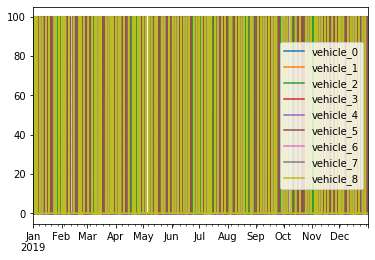

In [19]:
actions.plot()

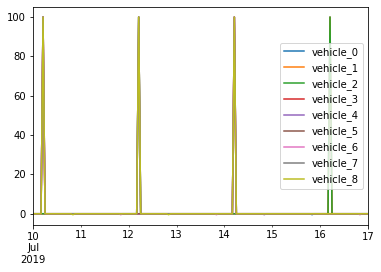

In [20]:
actions.truncate(before='2019-07-10', after='2019-07-17').plot()

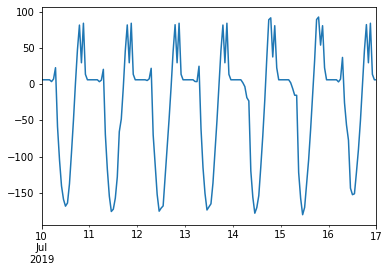

In [21]:
rewards['gridLoad'].truncate(before='2019-07-10', after='2019-07-17').plot()

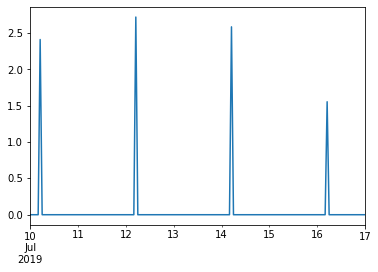

In [22]:
rewards['h2Charge'].truncate(before='2019-07-10', after='2019-07-17').plot()

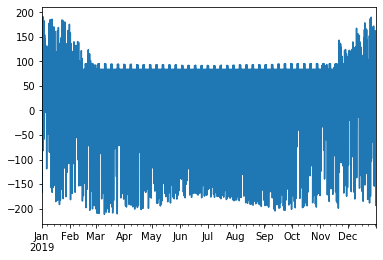

In [23]:
(states['buildingLoad'] - states['pvGeneration']).plot()